# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Javier Ramirez

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 15th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

An owner of a taxi company wants to estimate his fleet's average fuel economy over the next year in order to estimate the company's future fuel costs.  His fleet of taxis is made up of 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes.  The owner randomly selects 12 vehicles from his vehicle registration rolls and tracks their fuel usage in miles per gallon over the next week.  So as to get a proper estimate, he intentionally selects 6 Crown Vics, 3 Priuses, and 3 Escapes to track. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 


- The population: Owner's vehicle fleet

- Sample Frame: 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes

- Sample: 12 vehicles: 6 CV, 3TP, 3FE

- Type of Sample: systematic sample

- Quantity of interest: 12

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
3.0 \quad 
3.2 \quad
4.2 \quad
5.0
$$

with sample mean $4$ and sample median $4.2$. 

**Part A**: We replace the element $3.2$ by some real number $y$. What happens with the sample mean and the sample median of this new dataset as $y \rightarrow \infty$?


The sum of the data set would be $17 + y$ which goes to infinity as $y \rightarrow \infty$, so the sample mean also goes to infinity
since we only divide the sum by the sample size n.

3.0 4.2 4.6 5.0 y
The sample median would be 4.6

**Part B**: We replace a number of elements by some real number $y$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $y \rightarrow \infty$?

We would need to replace at least three number so it would 4.6 3.0 y y y therefore, the sample median would be $\infty$
as $y \rightarrow \infty$.

**Part C**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $y$, so that the sample mean of the new dataset goes to infinity as $y \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

For the sample mean only one number in the data set has to be y so that it goes to $\infty$.
$n = 2k + 1$, when odd that means the middle element is the $k+1$ number and inorder for that number to go to $\infty$ 
the middle number has to be y so that it goes to $\infty$. To replace the middle number and also other k by y.
so that $k = (n+1)/2$.
$n = 2k$, when even the middle number is the average of the kth element and $k+1$. Which we also have to replace the kth
and $k+1$ by y, therefore, $k = n/2$ and $(n+1)/2$

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

$$
\bar{x}_n = \frac{1}{n-1} \sum_{k=1}^{n-1} x_k + \frac{x_n - \frac{1}{n-1} \sum_{k=1}^{n-1} x_k}{n}
$$

$$
\bar{x}_n = \frac{1}{n-1} \sum_{k=1}^{n-1} x_k + \frac{x_n}{n} - \frac{1}{n(n-1)} \sum_{k=1}^{n-1} x_k
$$

$$
\bar{x}_n = \frac{n}{n(n-1)} \sum_{k=1}^{n-1} x_k + \frac{x_n}{n} - \frac{1}{n(n-1)} \sum_{k=1}^{n-1} x_k 
$$

$$
\bar{x}_n = \frac{n-1}{n(n-1)} \sum_{k=1}^{n-1} x_k + \frac{x_n}{n}
$$

$$
\bar{x}_n = \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{x_n}{n}
$$

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k
$$

**Part B**: Show algebraically that the following relation holds between the variance of the first $n-1$ observations and the variance of all $n$ observations: 

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

**Part C**: It turns out that in some scenarios the variance calculation in **Part B** can suffer from numerical instability (that is, due to round-off errors and finite precision arithmetic, the algorithm can return garbage).  A better method is to update the sum of squares term incrementally and then divide by $n-1$ at the end.  Define the sum of squares with $n$ observations as $
M_n = \sum_{k=1}^n (x_k - \bar{x}_n)^2$. We can then compute the sample variance as $s_n^2 = M_n/(n-1)$.

Show algebraically that the following relation holds between the sum of squares with $n-1$ observations and the sum of squares with all $n$ observations: 

$$
M_n = M_{n-1} + (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)
$$

$$
M_n - M_{n-1} = (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)
$$

$$
\sum_{k=1}^n (x_k - \bar{x}_n)^2 - \sum_{k=1}^{n-1} (x_k - \bar{x}_{n-1})^2
$$

$$
(x_n - \bar{x}_n)^2 + \sum_{k=1}^{n-1} (x_k - \bar{x}_n)^2 - \sum_{k=1}^{n-1} (x_k - \bar{x}_{n-1})^2
$$

$$
(x_n - \bar{x}_n)^2 + \sum_{k=1}^{n-1} ((x_k - \bar{x}_n)^2 - (x_k - \bar{x}_{n-1})^2)
$$

$$
(x_n - \bar{x}_n)^2 + \sum_{k=1}^{n-1} (((x_k - \bar{x}_n) + (x_k - \bar{x}_{n-1}))((x_k - \bar{x}_n) - (x_k - \bar{x}_{n-1})))
$$

$$
(x_n - \bar{x}_n)^2 + (\bar{x}_{n-1}- \bar{x}_n)\sum_{k=1}^{n-1} (2x_k - \bar{x}_n - \bar{x}_{n-1})
$$

$$
(x_n - \bar{x}_n)^2 + (\bar{x}_{n-1}- \bar{x}_n)(\sum_{k=1}^{n-1} 2x_k - \sum_{k=1}^{n-1}\bar{x}_n - \sum_{k=1}^{n-1}\bar{x}_{n-1})
$$

$$
(x_n - \bar{x}_n)^2 + (\bar{x}_{n-1}- \bar{x}_n)(2\sum_{k=1}^{n-1} x_k - (n-1)\bar{x}_n - (n-1)\bar{x}_{n-1})
$$

$$
(x_n - \bar{x}_n)^2 + (\bar{x}_{n-1}- \bar{x}_n)(2(n-1)\bar{x}_{n-1} - (n-1)\bar{x}_n - (n-1)\bar{x}_{n-1})
$$

**Informative But Not Required**: Write a Python function that implements the online variance computation in **Part C** and  requires only one pass over the data. 

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in titanic_data.csv and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [49]:
# Two different paths to the data 
local_path = 'titanic_data.csv'
web_path = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk01/titanic_data.csv'

# Select the path that works for you 
file_path = web_path 

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Part A**: Explain in words what patterns you might see in the data if there were male chivalry in the final hours aboard the Titanic?  What patterns might you see if there were class warfare in the final hours?

If male chivary happened I would conclude that males had a lower survival rate then the females.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [50]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age","Sex"]).copy()
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [51]:
class1Survived = dfTitanic.loc[dfTitanic["Pclass"]==1, "Survived"].sum()
class1 = dfTitanic.loc[dfTitanic["Pclass"]==1, "Pclass"].sum()
classFraction1 = class1Survived / class1

class2Survived = dfTitanic.loc[dfTitanic["Pclass"]==2, "Survived"].sum()
class2 = dfTitanic.loc[dfTitanic["Pclass"]==2, "Pclass"].sum()
classFraction2 = class2Survived / class2

class3Survived = dfTitanic.loc[dfTitanic["Pclass"]==3, "Survived"].sum()
class3 = dfTitanic.loc[dfTitanic["Pclass"]==3, "Pclass"].sum()
classFraction3 = class3Survived / class3

print("{}/{} people from class 1 survived, having a class fraction of {}". format(class1Survived,class1,classFraction1))
print("{}/{} people from class 1 survived, having a class fraction of {}". format(class2Survived,class2,classFraction2))
print("{}/{} people from class 1 survived, having a class fraction of {}". format(class3Survived,class3,classFraction3))

122/186 people from class 1 survived, having a class fraction of 0.6559139784946236
83/346 people from class 1 survived, having a class fraction of 0.2398843930635838
85/1065 people from class 1 survived, having a class fraction of 0.07981220657276995


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [52]:
females = dfTitanic.loc[dfTitanic["Sex"] == 'female']
males= dfTitanic.loc[dfTitanic["Sex"] == 'male']


females1 = females.loc[dfTitanic["Pclass"]==1, "Pclass"].sum()
males1 = males.loc[dfTitanic["Pclass"]==1, "Pclass"].sum()
femalesClass1 = females.loc[dfTitanic["Pclass"]==1, "Survived"].sum()
malesClass1 = males.loc[dfTitanic["Pclass"]==1, "Survived"].sum()


females2 = females.loc[dfTitanic["Pclass"]==2, "Pclass"].sum()
males2 = males.loc[dfTitanic["Pclass"]==2, "Pclass"].sum()
femalesClass2 = females.loc[dfTitanic["Pclass"]==2, "Survived"].sum()
malesClass2 = males.loc[dfTitanic["Pclass"]==2, "Survived"].sum()


females3 = females.loc[dfTitanic["Pclass"]==3, "Pclass"].sum()
males3 = males.loc[dfTitanic["Pclass"]==3, "Pclass"].sum()
femalesClass3 = females.loc[dfTitanic["Pclass"]==3, "Survived"].sum()
malesClass3 = males.loc[dfTitanic["Pclass"]==3, "Survived"].sum()


print("{}/{} Females of Class 1 survived.".format(femalesClass1,females1))
print("{}/{} Males of Class 1 survived..".format(malesClass1,males1))
print("{}/{} Females of Class 2 survived.".format(femalesClass2,females2))
print("{}/{} Males of Class 2 survived.".format(malesClass2,males2))
print("{}/{} Females of Class 3 survived.".format(femalesClass3,females3))
print("{}/{} Males of Class 3 survived.".format(malesClass3,males3))

print("Men in first class would have a survival rate of (40/101) = 0.396 and females in third class had a survival rate of (47/306) = 0.154; therefore, men had a higher chance of survival")

82/85 Females of Class 1 survived.
40/101 Males of Class 1 survived..
68/148 Females of Class 2 survived.
15/198 Males of Class 2 survived.
47/306 Females of Class 3 survived.
38/759 Males of Class 3 survived.
Men in first class would have a survival rate of (40/101) = 0.396 and females in third class had a survival rate of (47/306) = 0.154; therefore, men had a higher chance of survival


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

Axes(0.125,0.125;0.775x0.775)
The distribution of AGE is unimodel and it has a posative skew.


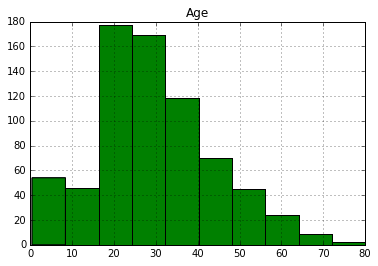

In [53]:
dfTitanic.hist(column="Age")
print(dfTitanic["Age"].hist())

print("The distribution of AGE is unimodel and it has a posative skew.")

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [56]:
Females = dfTitanic.loc[dfTitanic["Sex"]=='female']
survived = Females.loc[Females["Survived"]==1, "Age"]
died = Females.loc[Females["Survived"]==0, "Age"]
print("Survived: {}".format(survived.describe()))
print("Died: {}".format(died.describe()))

print("Mean age was lower for women who died and median was lower for females that died.")

Survived: count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64
Died: count    64.000000
mean     25.046875
std      13.618591
min       2.000000
25%      16.750000
50%      24.500000
75%      33.250000
max      57.000000
Name: Age, dtype: float64
Mean age was lower for women who died and median was lower for females that died.


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data suggest that their was a combination of both class warfare and male chilvalry. This shows male chivalry because in all of the classes it shows women had a higher survival rate than men. This also shows class warfare because males in the higher class had similar rates of females in the lower class paticularly the middle class and at higher rates than women of the lower class. Men in the middle and lower classes had low chances of survival compared to men at the higher class and women in all of the other classes.

### Problem 5
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [57]:
# Two different paths to the data 
local_path = 'babies.data'
web_path = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk01/babies.data'

# Select the path that works for you 
file_path = web_path 

# Load the data into a DataFrame 
dfBabies = pd.read_csv(file_path,delim_whitespace=True)

dfBabies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristic.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [58]:
dfBabies = dfBabies[dfBabies.bwt != 999]
dfBabies = dfBabies[dfBabies.gestation != 999]
dfBabies = dfBabies[dfBabies.parity != 9]
dfBabies = dfBabies[dfBabies.height != 99]
dfBabies = dfBabies[dfBabies.weight != 999]
dfBabies = dfBabies[dfBabies.smoke != 9]
dfBabies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

Non-Smoker: count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: bwt, dtype: float64
Smoker: count    460.000000
mean     113.823913
std       18.275353
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: bwt, dtype: float64


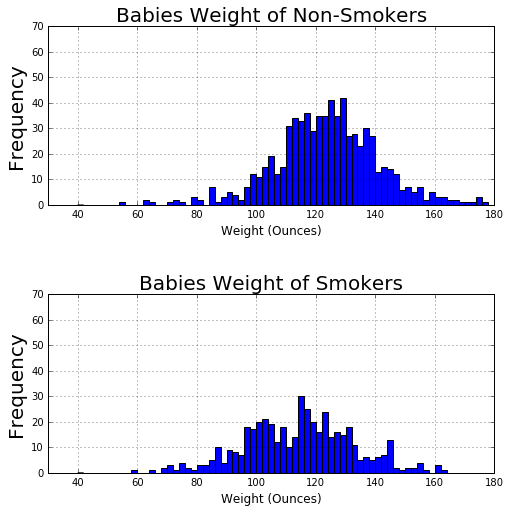

In [59]:
non_Smoke = dfBabies.loc[dfBabies["smoke"]==0, "bwt"]
Smoke = dfBabies.loc[dfBabies["smoke"]==1, "bwt"]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax[0].set_title("Babies Weight of Non-Smokers", fontsize=20)
ax[1].set_title("Babies Weight of Smokers", fontsize=20)

ax[0].set_xlabel("Weight (Ounces)", fontsize=12)
ax[0].set_ylabel("Frequency", fontsize=20)
ax[1].set_xlabel("Weight (Ounces)", fontsize=12)
ax[1].set_ylabel("Frequency", fontsize=20)

ax[0].set_xlim((30,180))
ax[1].set_xlim((30,180))
ax[0].set_ylim((0,70))
ax[1].set_ylim((0,70))

non_Smoke.hist(bins=range(40,300,2),ax=ax[0])
Smoke.hist(bins=range(40,300,2),ax=ax[1])
fig.subplots_adjust(hspace=.5)
print("Non-Smoker: {}".format(non_Smoke.describe()))
print("Smoker: {}".format(Smoke.describe()))

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

Both of the histograms are unimodal, they both had different mins and maxes. The min for the smoker is 87 ounces and max = 215 ounces and for the non-smoker is min = 89 ounces and max = 250. The means were also different for non-smoker = 129.5 and smoker = 126.9. For non-smokers babies and smoker babies it was posatively skewed.

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

For smokers the mean is 113.8 ounces and median is 115.0. For non-smokers the mean is 123.1 and the median is 123.0. The mean difference is 9.3 ounces and median difference is 8 ounce.
I would not use the mean because it's not perfectly posatively askewed. Also the graphs for smokers and non-smokers are only 3/4 the size from each other.

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

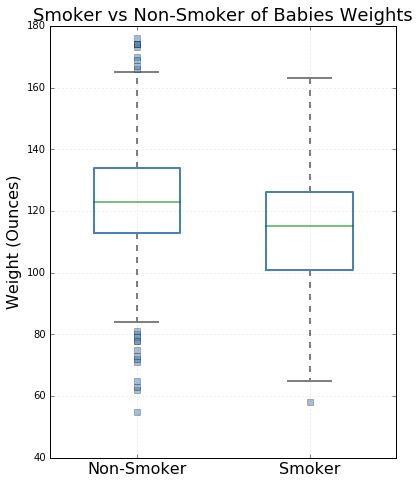

In [60]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to Gross and Ralston reservoirs, we
# select only the rows of the DataFrame coresponding to those names, then
# call boxplot and pass by="NAME" to break the data into the two sets
dfBabies = dfBabies.astype(int)
babiesSmokingWeight = dfBabies.loc[(dfBabies["smoke"]==0) | (dfBabies["smoke"]==1)].boxplot(column=["bwt"], by="smoke", ax=ax, widths=[.5, .5], return_type="dict")
for column in babiesSmokingWeight:
        
# Change properties in boxes
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
        
# Change properties of whiskers
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)
        
# Change properties of caps
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)
        
# Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)
        
# Change properties of fliers (outliers)
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
        
# Set title and vertical axis label
ax.set_title('Smoker vs Non-Smoker of Babies Weights', fontsize=18)
ax.set_ylabel("Weight (Ounces)", fontsize=16)
              
# names of plots
plt.xticks([1,2],["Non-Smoker", "Smoker"], rotation=0, fontsize=16)
                  
# take off old titles and xlables
plt.suptitle("")
ax.set_xlabel("")
              
# Makelighter
ax.grid(alpha=0.25);


**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

Distribution of body weights of babies within the smoker was 100 - 130. For non-smoking was between 110 and 135. This is skewed because the outliers are on one side of the plots for the smoker and for the non-smoker it is evenly distributed. Most of the weights of the babies are between 85 and 165 and the mean is about the same. The babies from the the non-smoker has a higher maximum than the smoker. This tells us that babies who were born when the parents did not smoke have babies that weigh more.

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **DISTRICT**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **DISTRICT**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [61]:
def clean_election_data():
    '''
    Function to clean election data 
    '''
    df = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk01/2014_election_results.csv")
    dfSelected = df.dropna(subset=["STATE", "D", "GENERAL PERCENT"]).copy()
    dfSelected.loc[((pd.isnull(dfSelected["CANDIDATE NAME"])) | (dfSelected["CANDIDATE NAME"] == "Scattered")) & ((pd.notnull(dfSelected["CANDIDATE NAME (Last)"])) & (dfSelected["CANDIDATE NAME (Last)"] != "Scattered")), "CANDIDATE NAME"] = dfSelected.loc[ : ,"CANDIDATE NAME (Last)"]
    dfSelected.loc[((pd.isnull(dfSelected["CANDIDATE NAME"])) | (dfSelected["CANDIDATE NAME"] == "Scattered")) & ((pd.isnull(dfSelected["CANDIDATE NAME (Last)"])) | (dfSelected["CANDIDATE NAME (Last)"] == "Scattered")), "CANDIDATE NAME"] = "UNKNOWN"
    dfSelected["GENERAL PERCENT"] = dfSelected["GENERAL PERCENT"].apply(lambda x: (x.replace(',' , '.').replace('%','')))
    dfSelected["GENERAL PERCENT"] = dfSelected["GENERAL PERCENT"].apply(lambda x: (float(x)))

    dfSelected = dfSelected[["STATE", "D", "CANDIDATE NAME", "GENERAL PERCENT"]]
    return dfSelected
clean_election_data()

,STATE,D,CANDIDATE NAME,GENERAL PERCENT
0,Alabama,1,"Byrne, Bradley",68.16
1,Alabama,1,"LeFlore, Burton R.",31.71
2,Alabama,1,UNKNOWN,0.13
5,Alabama,2,"Roby, Martha",67.34
6,Alabama,2,Wright,32.56
7,Alabama,2,UNKNOWN,0.09
10,Alabama,3,"Rogers, Mike",66.12
13,Alabama,3,"Smith, Jesse T.",33.72
14,Alabama,3,UNKNOWN,0.16
17,Alabama,4,"Aderholt, Robert",98.57


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [62]:
def winners_and_margins(df):

    winning = df.groupby(["STATE", "D"])["GENERAL PERCENT"].agg('idxmax')
    dfWon = df.loc[winning, ["STATE", "D", "CANDIDATE NAME"]]
    dfWon.rename(columns={"CANDIDATE NAME" : "WINNER"}, inplace=True)
    dfMarg = df.groupby(["STATE", "D"], as_index = False)["GENERAL PERCENT"].agg({"MARGIN" :lambda x: x.nlargest(1).sum() - (x.nlargest(2).sum()- x.nlargest(1).sum())})
    dfWon = pd.merge(dfWon, dfMarg)
    dfWon = dfWon.sort_values(by="MARGIN", ascending=True)
    return dfWon

winners_and_margins(clean_election_data())

,STATE,D,WINNER,MARGIN
10,Arizona,2,McSally,0.07
343,Pennsylvania,H,Scattered (Write-In Votes for All Districts),0.17
72,California,7,"Bera, Ami",0.80
98,Florida,2,"Graham, Gwen",1.13
218,Minnesota,8,"Nolan, Rick",1.40
185,Maryland,6,"Delaney, John K.",1.45
29,California,16,Costa,1.46
421,Washington,4,"Newhouse, Dan",1.62
378,Texas,23,"Hurd, Will",2.10
158,Iowa,1,"Blum, Rod",2.28


### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_, authors Darrell Huff and Irving Geis describe some common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. **If you come up with something that you're proud of then please post it to Piazza!**